# HOTELS - Analyse des sentiments - Illustration sur Newport_Bay

**(1) Préparation du répertoire et des principaux packages**

In [4]:
import os
os.chdir("C:/Disney")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

**(2) Analyse rapide du fichier**

**8860 avis** entre septembre 2016 et décembre 2022. 392 avis pour 2022, soit **32 avis en moyenne / mois**. 

In [111]:
reviews=pd.read_csv("hotel_newport_clean.csv",sep=",")
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8860 entries, 0 to 8859
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   titre_commentaire  8860 non-null   object
 1   commentaire        8860 non-null   object
 2   Date_Avis          8860 non-null   object
 3   Ville              8860 non-null   object
 4   Pays               8860 non-null   object
 5   Date_Sejour        8860 non-null   object
 6   Note               8860 non-null   int64 
 7   Photo              8860 non-null   object
 8   langue             8860 non-null   object
dtypes: int64(1), object(8)
memory usage: 623.1+ KB


In [141]:
#Le fichier comprend des avis datés entre juin 2021 et décembre 2022
reviews['Date_Avis'].tail(1)

8859    sept 2016
Name: Date_Avis, dtype: object

In [142]:
reviews['Date_Avis'].head(1)

0    déc 2022
Name: Date_Avis, dtype: object

In [214]:
#on recherche la ligne du premier avis de 2022
reviews[reviews.isin(['janvier 2022'])].stack().tail(1)

391  Date_Sejour    janvier 2022
dtype: object

In [212]:
#vérification
reviews['Date_Sejour'].head(393)

0      décembre 2022
1      décembre 2022
2      décembre 2022
3      novembre 2022
4      novembre 2022
           ...      
388     janvier 2022
389     janvier 2022
390     janvier 2022
391     janvier 2022
392    décembre 2021
Name: Date_Sejour, Length: 393, dtype: object

**(3) Profils-clients**

(1). Langue du commentaire : plus de la moitié de francophones, suivis assez loin par les anglophones.

<AxesSubplot:xlabel="Langue de l'avis", ylabel='Nombre de répondants'>

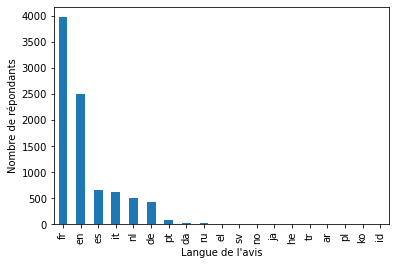

In [215]:
comptage=reviews['langue'].value_counts()
comptage.plot(kind='bar',stacked=True,ylabel="Nombre de répondants",xlabel="Langue de l'avis")

<AxesSubplot:ylabel='langue'>

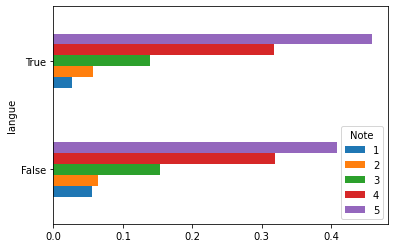

In [226]:
#Ventilation des Avis selon qu'ils sont francophones ou non
T=pd.crosstab(reviews['langue']=='fr',reviews['Note'], normalize='index')
T.plot.barh()

In [72]:
only_reviews = reviews.iloc[:, 1].values

Note    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

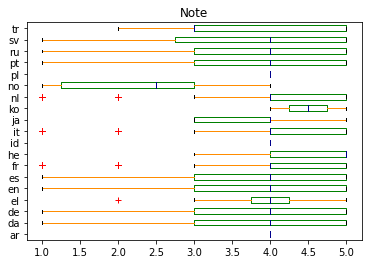

In [227]:
#Boîte de Turkey
color=dict(boxes='green',whiskers='DarkOrange',medians='DarkBlue',caps='Black')
reviews.plot.box(column='Note',by='langue',color=color,sym='r+',vert=False)

(3). Ventilation des notes.

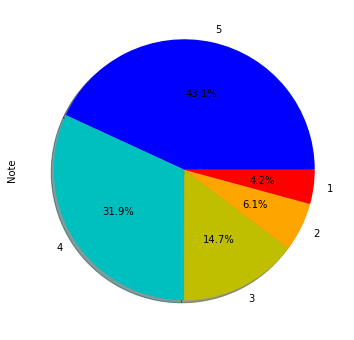

In [229]:
plt.figure(figsize=(6, 6))
cols = ['b','c','y','orange','r']
reviews['Note'].value_counts().plot.pie(autopct='%1.1f%%', shadow= True,colors=cols)
plt.show()

# I. Analyse des sentiments

In [81]:
#Afin de réaliser l'analyse des sentiments, transformer les sous-listes en listes
import ast
liste=[ast.literal_eval(x) for x in only_reviews]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [87]:
#Afin de réaliser l'analyse des sentiments, reformer les documents sous forme de chaîne 
documents =[" ".join(doc) for doc in liste]
print(documents[2])

hôtel parfait ambiance bords mer piscine service compas club remarquable merci tous cast member service courtoise gentillesse professionnalisme seul point négatif distance entre hôtel deux parcs


In [88]:
hotel_reviews = pd.DataFrame({'commentaires': documents})

In [89]:
hotel_reviews.head(3)

,commentaires
0,expérience moyenne prix vraiment extravagant r...
1,avon séjourné nuit hôtel magnifique literie co...
2,hôtel parfait ambiance bords mer piscine servi...


In [90]:
print(type(hotel_reviews))

<class 'pandas.core.frame.DataFrame'>


In [91]:
# Initialisation de SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chrys\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [101]:
# Fonction lambda pour obtenir les scores composés.
function = lambda title: vader.polarity_scores(title)['compound']
hotel_reviews['compound'] = hotel_reviews['commentaires'].apply(function)

In [92]:
hotel_reviews.head(3)

,commentaires
0,expérience moyenne prix vraiment extravagant r...
1,avon séjourné nuit hôtel magnifique literie co...
2,hôtel parfait ambiance bords mer piscine servi...


In [93]:
#si wordcloud non installé
#pip install wordcloud

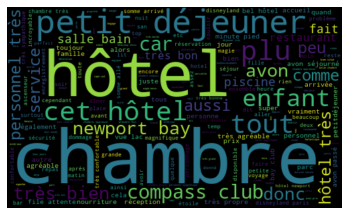

In [99]:
# Word cloud visualization.
import wordcloud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in hotel_reviews['commentaires']])
wordCloud = WordCloud(width=500, height=300, random_state=5000, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [244]:
#lancement de l'analyse des sentiments avec la fonction qu'on a créée
import getanalysis
hotel_reviews['sentiment'] = hotel_reviews['compound'].apply(getAnalysis)
hotel_reviews.tail(7)

,commentaires,compound,sentiment
8853,avon passé nuits jours cet hôtel hôtel air bie...,-0.1280,Negative
8854,somme allés newport bay hotel cadeau anniversa...,0.0000,Neutral
8855,séjours depuis décembreici compass club juste ...,0.0000,Neutral
8856,personnel charmant serviable respect esprit re...,0.3400,Positive
8857,hôtel récemment rénové très conservé trop gros...,0.3182,Positive
8858,mari deux fille somme depuis jours dès arrivez...,-0.1280,Negative
8859,chambre digne étoiles équipements basiques inc...,-0.7184,Negative


In [243]:
#lancement de l'analyse des sentiments
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

hotel_reviews['sentiment'] = hotel_reviews['compound'].apply(getAnalysis)

hotel_reviews.tail(7)

,commentaires,compound,sentiment
8853,avon passé nuits jours cet hôtel hôtel air bie...,-0.1280,Negative
8854,somme allés newport bay hotel cadeau anniversa...,0.0000,Neutral
8855,séjours depuis décembreici compass club juste ...,0.0000,Neutral
8856,personnel charmant serviable respect esprit re...,0.3400,Positive
8857,hôtel récemment rénové très conservé trop gros...,0.3182,Positive
8858,mari deux fille somme depuis jours dès arrivez...,-0.1280,Negative
8859,chambre digne étoiles équipements basiques inc...,-0.7184,Negative


In [103]:
hotel_reviews['sentiment'].value_counts()

Positive    4075
Neutral     2527
Negative    2258
Name: sentiment, dtype: int64

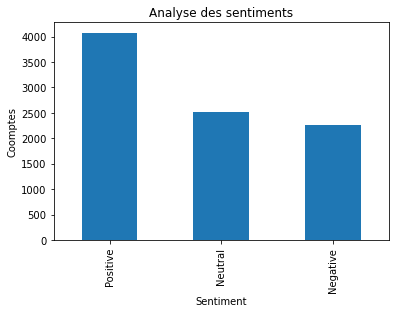

In [104]:
plt.title('Analyse des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Coomptes')
hotel_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Hotel Reviews Sentiment')

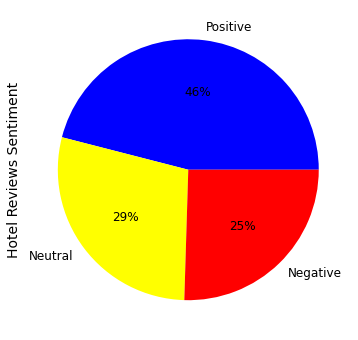

In [106]:
hotel_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "yellow","red"])
plt.ylabel("Hotel Reviews Sentiment", size=14)

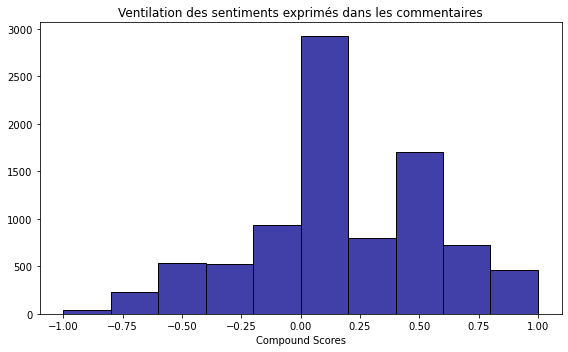

In [107]:
plt.figure(figsize=(8, 5))
sns.histplot(hotel_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Ventilation des sentiments exprimés dans les commentaires")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()